In [1]:
# Project (7): Loan Prediction

# Loans are the core business of banks. The main profit comes directly from
# the loan’s interest. The loan companies grant a loan after an intensive
# process of verification and validation. However, they still don’t have
# assurance if the applicant is able to repay the loan with no difficulties.

# The goal of the project is to:
# • Predict if the user can take loan or not from the given features.

# Main steps:

# Preprocessing:
# • Before building your models, you need to make sure that the
# dataset is clean and ready-to-use.
# Classification:
# • Train using Logistic Regression, SVM and Decision tree (ID3)
# models and print the model accuracy.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer

In [3]:
# loading dataset
loan_dataset = pd.read_csv('loan_data.csv')

In [4]:
# check if there is any abnormal values
# print(loan_dataset['Gender'].value_counts())
# print(loan_dataset['Married'].value_counts())
# print(loan_dataset['Dependents'].value_counts())
# print(loan_dataset['Education'].value_counts())
# print(loan_dataset['Self_Employed'].value_counts())
# print(loan_dataset['ApplicantIncome'].value_counts())
# print(loan_dataset['CoapplicantIncome'].value_counts())
# print(loan_dataset['LoanAmount'].value_counts())
# print(loan_dataset['Loan_Amount_Term'].value_counts())
# print(loan_dataset['Credit_History'].value_counts())
# print(loan_dataset['Property_Area'].value_counts())
# print(loan_dataset['Loan_Status'].value_counts())

In [5]:
# fill the missing values for numerical term(mean)
loan_dataset['LoanAmount'] = loan_dataset['LoanAmount'].fillna(loan_dataset['LoanAmount'].mean())
loan_dataset['Loan_Amount_Term'] = loan_dataset['Loan_Amount_Term'].fillna(loan_dataset['Loan_Amount_Term'].mean())
loan_dataset['Credit_History'] = loan_dataset['Credit_History'].fillna(loan_dataset['Credit_History'].mean())

In [6]:
# fill the missing valus for categorical term(mode)
loan_dataset['Gender'] = loan_dataset['Gender'].fillna(loan_dataset['Gender'].mode()[0])
loan_dataset['Married'] = loan_dataset['Married'].fillna(loan_dataset['Married'].mode()[0])
loan_dataset['Dependents'] = loan_dataset['Dependents'].fillna(loan_dataset['Dependents'].mode()[0])
loan_dataset['Self_Employed'] = loan_dataset['Self_Employed'].fillna(loan_dataset['Self_Employed'].mode()[0])
print(loan_dataset.isnull().sum())
print(loan_dataset.shape)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
(614, 13)


In [7]:
# delete duplicated rows
loan_dataset = loan_dataset.drop_duplicates(keep='first')

In [8]:
# feature extraction 
onehot_encoder = DictVectorizer()
instances = [{'Property_Area': 'Rural'},
             {'Property_Area': 'Semiurban'},
             {'Property_Area': 'Urban'}]
print(onehot_encoder.fit_transform(instances).toarray())

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [9]:
# data conversion
loan_dataset_conversion=loan_dataset.replace({'Gender': {'Male': 0, 'Female': 1},
                      'Married': {'No': 0, 'Yes': 1},
                      'Education': {'Not Graduate': 0, 'Graduate': 1},
                      'Self_Employed': {'No': 0, 'Yes': 1},
                      'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
                      'Loan_Status': {'N': 0, 'Y': 1},
                      'Dependents': {'3+': 4}}, inplace=True)

In [10]:
# train test split
x = loan_dataset.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
y = loan_dataset['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)
print(x.shape, x_train.shape, x_test.shape)


(614, 11) (429, 11) (185, 11)


In [11]:
#https://www.youtube.com/watch?v=d1sXfT5Ihsc&list=PLPBnj6azlABaNz3wcEj7SwFLeQ-nlHQaf&index=6
#Data Scaleing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled= scaler.transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [12]:
#The feature -Bonus

Training set score: 0.814
Test set score: 0.800


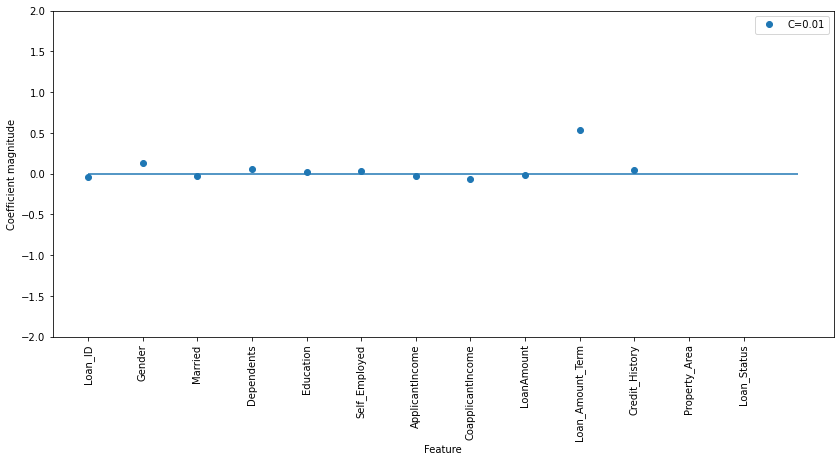

In [13]:
#https://www.youtube.com/watch?v=3k8S5fQh78w&list=PLPBnj6azlABaNz3wcEj7SwFLeQ-nlHQaf&index=5
logreg = LogisticRegression(C=0.01).fit(x_train_scaled, y_train) ##C=1
print("Training set score: {:.3f}".format(logreg.score(x_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg.score(x_test_scaled, y_test)))
loan_dataset_features = [x for i,x in enumerate(loan_dataset.columns) if i!=13]
plt.figure(figsize=(14,6))
plt.plot(logreg.coef_.T, 'o', label="C=0.01")
plt.xticks(range(loan_dataset.shape[1]), loan_dataset_features, rotation=90)
plt.hlines(0, 0, loan_dataset.shape[1])
plt.ylim(-2, 2)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')

In [14]:
#--------------------------------------------------------------

In [15]:
#function to calculate Accuracy
def evaluate_model(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred_train=clf.predict(x_train)
    y_pred_test=clf.predict(x_test)
    acc_train=accuracy_score(y_train,y_pred_train)
    acc_test=accuracy_score(y_test,y_pred_test)
    print(clf.__class__.__name__)
    print('Accuracy of training:',acc_train)
    print('Accuracy of test:',acc_test)
    print('-------------------------------')
    return acc_train,acc_test

In [16]:
#Logistic Regression, SVM and Decision tree (ID3)
#https://www.youtube.com/watch?v=rwLeL_u53nE&list=PLPBnj6azlABaNz3wcEj7SwFLeQ-nlHQaf&index=11
LR = LogisticRegression(C=0.01)
acc_train_bag, acc_test_bag = evaluate_model(LR,x_train_scaled,
                                        y_train,x_test_scaled,y_test)
#https://www.youtube.com/watch?v=Aym_73xikz4&list=PLPBnj6azlABaNz3wcEj7SwFLeQ-nlHQaf&index=12
SVM_model = svm.SVC(kernel='linear')
acc_train_bag, acc_test_bag = evaluate_model(SVM_model,x_train_scaled,
                                        y_train,x_test_scaled,y_test)
#https://www.youtube.com/watch?v=LcFM_4ocfRk&list=PLPBnj6azlABaNz3wcEj7SwFLeQ-nlHQaf&index=16
Dtree = DecisionTreeClassifier(max_depth=3)
acc_train_bag, acc_test_bag = evaluate_model(Dtree,x_train_scaled,
                                        y_train,x_test_scaled,y_test)
#https://www.youtube.com/watch?v=BNfMrlMg4Ys&list=PLPBnj6azlABaNz3wcEj7SwFLeQ-nlHQaf&index=17
knn_model = KNeighborsClassifier()
acc_train_bag, acc_test_bag = evaluate_model(knn_model,x_train_scaled,
                                        y_train,x_test_scaled,y_test)
#https://www.youtube.com/watch?v=v5Qoj4f-UNA&list=PLPBnj6azlABaNz3wcEj7SwFLeQ-nlHQaf&index=18
NB_model = BernoulliNB()
acc_train_bag, acc_test_bag = evaluate_model(NB_model,x_train_scaled,
                                        y_train,x_test_scaled,y_test)


LogisticRegression
Accuracy of training: 0.8135198135198135
Accuracy of test: 0.8
-------------------------------
SVC
Accuracy of training: 0.8135198135198135
Accuracy of test: 0.8
-------------------------------
DecisionTreeClassifier
Accuracy of training: 0.8298368298368298
Accuracy of test: 0.7837837837837838
-------------------------------
KNeighborsClassifier
Accuracy of training: 0.8181818181818182
Accuracy of test: 0.8054054054054054
-------------------------------
BernoulliNB
Accuracy of training: 0.8135198135198135
Accuracy of test: 0.8
-------------------------------


DecisionTreeClassifier
Accuracy of training: 0.8298368298368298
Accuracy of test: 0.7783783783783784
-------------------------------
SVC
Accuracy of training: 0.8135198135198135
Accuracy of test: 0.8
-------------------------------
LogisticRegression
Accuracy of training: 0.8135198135198135
Accuracy of test: 0.8
-------------------------------
KNeighborsClassifier
Accuracy of training: 0.8181818181818182
Accuracy of test: 0.8054054054054054
-------------------------------
BernoulliNB
Accuracy of training: 0.8135198135198135
Accuracy of test: 0.8
-------------------------------


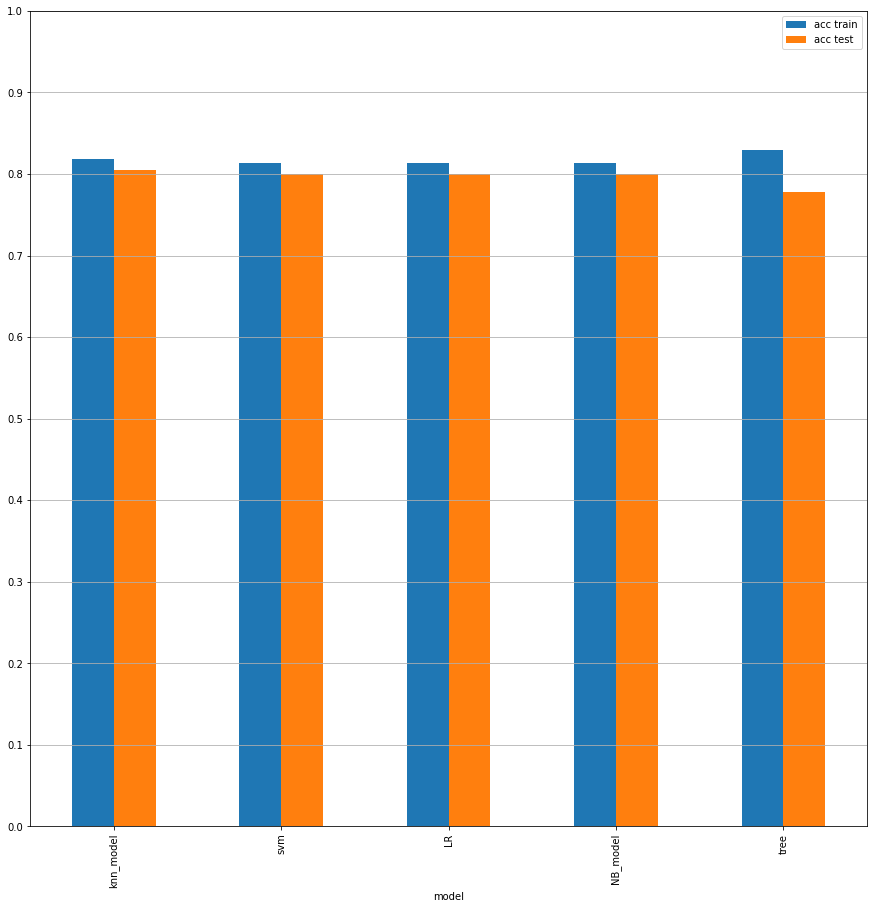

In [17]:
estimators = [
    ('tree',Dtree),
    ('svm',SVM_model),
    ('LR',LR),
    ('knn_model',knn_model),
    ('NB_model',NB_model)
]
result= {
    'model': [],
    'acc train': [],
    'acc test': []
}
for (name,clf) in estimators:
    acc_train, acc_test = evaluate_model(clf,x_train_scaled,
                                        y_train,x_test_scaled,y_test)
    result['model'].append(name)
    result['acc train'].append(acc_train)
    result['acc test'].append(acc_test)
result = pd.DataFrame(result)
result = result.sort_values(by='acc test', ascending=False, ignore_index=True)
result.plot.bar(x='model',y=['acc train','acc test'],figsize=(15, 15))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.grid(axis='y')
plt.show()

In [18]:
model_best=KNeighborsClassifier()
model_best.fit(x_train_scaled, y_train)
y_pred_test= model_best.predict(x_test_scaled)
accuracy_score(y_test, y_pred_test)

0.8054054054054054